In [126]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
import re

In [127]:
file_dir= "/Users/bnb/Desktop/analytics/8_ETL/Movies_ETL/resources/"

In [128]:
with open(f'{file_dir}wikipedia-movies.json', mode= 'r') as file:
    wiki_movies_raw= json.load(file)

In [129]:
len(wiki_movies_raw)

7311

In [130]:
kaggle_metadata= pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings= pd.read_csv(f'{file_dir}ratings.csv')

In [131]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
30890,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://www.jeffdunham.com,14542,tt0806102,en,Jeff Dunham: Arguing with Myself,"Arguing With Myself, a recorded live performan...",...,2006-04-11,0.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Jeff Dunham: Arguing with Myself,False,6.8,26.0
39596,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",NaN,404829,tt4948040,en,Emma's Chance,While fulfilling her community service hours a...,...,2016-07-05,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In rescuing I was rescued,Emma's Chance,False,5.4,24.0
25720,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,28532,tt0057993,en,Danza macabra,A writer accepts a bet that he cannot spend th...,...,1964-02-27,0.0,87.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,The living and the dead change places in an or...,Castle of Blood,False,7.5,11.0
24308,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,73818,tt1650535,en,The Entitled,Without the security of the job he wants or th...,...,2011-09-06,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Entitled,False,5.9,40.0
13755,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,81512,tt0048350,en,Many Rivers to Cross,"Packaged and sold as an outdoor actioner, Many...",...,1955-02-04,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,KENTUCKY ADVENTURE in CINEMASCOPE,Many Rivers to Cross,False,6.0,2.0


In [132]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
10806268,111622,97785,3.0,1452873993
19782718,205578,784,3.0,837604425
4257277,44186,916,4.0,1013299143
25672966,267207,232,4.5,1132502371
794601,8179,68954,3.5,1464359556


In [133]:
wiki_movies_df= pd.DataFrame(wiki_movies_raw)
len(wiki_movies_df)

7311

In [134]:
wiki_movies= [movie for movie in wiki_movies_raw
            if ('Director' in movie or 'Directed by' in movie)
            and 'imdb_link' in movie
            and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [135]:
def clean_movie(movie):
    movie= dict(movie) #create non-destructive copy
    return movie

In [136]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [137]:
sorted(wiki_movies_df.columns.to_list())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [138]:
def clean_movie(movie):
    movie= dict(movie) #create non-destructive copy
    alt_titles= {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key]= movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles']= alt_titles
    return movie

In [139]:
clean_movies= [clean_movie(movie) for movie in wiki_movies]

In [140]:
wiki_movies_df= pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [141]:
def clean_movie(movie):
    movie= dict(movie) #create non-destructive copy

    #combine alt titles into one list
    alt_titles= {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key]= movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles']= alt_titles

    #merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name]= movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running Time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie


In [142]:
clean_movies= [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df= pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running Time',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [143]:
wiki_movies_df["imdb_id"]= wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Running Time,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [144]:
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 141],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Running Time', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [145]:
wiki_columns_to_keep= [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df= wiki_movies_df[wiki_columns_to_keep]

wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)',
       'Composer(s)', 'Producer(s)', 'Production company(s)', 'Writer(s)',
       'imdb_id'],
      dtype='object')

In [146]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [147]:
len(wiki_movies_df['Box office'])

7033

In [148]:
box_office = wiki_movies_df['Box office'].dropna()

In [149]:
len(box_office)

5485

In [150]:
def is_not_a_string(x):
    return lambda x: type(x) !=str

box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [151]:
box_office= box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [152]:
form_one= r'\$\s*\d+\.?\d*\s[mb]illi?on'

box_office.str.contains(form_one, flags=re.I, na=False).sum()

3903

In [153]:
form_two= r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
box_office.str.contains(form_two, flags=re.I, na=False).sum()

1559

In [154]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [155]:
box_office= box_office.str.replace(r'\$.*[---](?![a-z])', '$', regex=True)

In [156]:
box_office[~matches_form_one & ~matches_form_two]

110                   $4.37 million
600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3088      $32 [2] –33.1 million [1]
3631                            TBA
3859             $38.9–40.3 million
3879       CN¥3.650 million (China)
4116                     £7,385,434
4261             $20.7–23.9 million
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6145             $17.5–18.4 million
6234             $41.8–41.9 million
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [157]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [158]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.I):

        # remove dollar sign and " million"
        s= re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a million
        value= float(s) * 10**6
        # return value
        return value
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.I):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        # convert to float and multiply by a billion
        value= float(s) * 10**9
        # return value
        return value
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.I):
        # remove dollar sign and commas
        s = re.sub('\$|,','', s)
        # convert to float
        value= float(s) 
        # return value
        return value
    # otherwise, return NaN
    else:
        return np.nan

In [159]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.I)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [160]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [161]:
budget= wiki_movies_df['Budget'].dropna()
budget= budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget= budget.str.replace(r'\$.*[---](?![a-z])', '$', regex=True)

In [162]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

110                     $5–7 million
136                          Unknown
196     $6.5–10 million [1] [Note 1]
204      60 million Norwegian Kroner
235                   $50–65 million
                    ...             
7062                $100–150 million
7066                $160–200 million
7067                $102–135 million
7068                  $39–50 million
7070                    €4.3 million
Name: Budget, Length: 232, dtype: object

In [163]:
budget = budget.str.replace(r'\[\d+\]\s*', '', regex=True)
budget[~matches_form_one & ~matches_form_two]

110                    $5–7 million
136                         Unknown
196        $6.5–10 million [Note 1]
204     60 million Norwegian Kroner
235                  $50–65 million
                   ...             
7062               $100–150 million
7066               $160–200 million
7067               $102–135 million
7068                 $39–50 million
7070                   €4.3 million
Name: Budget, Length: 232, dtype: object

In [164]:
wiki_movies_df['budget']= budget.str.extract(f'({form_one}|{form_two})', flags=re.I)[0].apply(parse_dollars)

In [165]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [166]:
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7071    42000000.0
7072    60000000.0
7073    20000000.0
7074     9000000.0
7075           NaN
Name: budget, Length: 7033, dtype: float64

In [167]:
release_date= wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [168]:
date_form_one= r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two= r'\d{4}.[01]\d.[0123]\d'
date_form_three=r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four= r'\d{4}'

In [169]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [171]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [172]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [175]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [176]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.I, na=False, regex=True) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 364, dtype: object

In [177]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6876

In [179]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False) != True]

1551     varies
3925    4 hours
Name: Running time, dtype: object

In [180]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [181]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [ ]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [182]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [186]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
kaggle_metadata= kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis= 'columns')

In [189]:
kaggle_metadata['video']= kaggle_metadata['video']== 'True'

In [191]:
kaggle_metadata['budget']= kaggle_metadata['budget'].astype(int)
kaggle_metadata['id']= pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity']= pd.to_numeric(kaggle_metadata['popularity'], errors='raise')
kaggle_metadata['release_date']= pd.to_datetime(kaggle_metadata['release_date'])


In [193]:
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [194]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [195]:
ratings['timestamp']= pd.to_datetime(ratings['timestamp'], unit='s')

<bound method NDFrame.describe of 0                          1.00
1                          4.50
2                          5.00
3                          5.00
4                          5.00
                   ...         
26024284                   5.00
26024285                   5.00
26024286                   4.50
26024287                   4.50
26024288                   2.00
Name: rating, Length: 26024289, dtype: float64>

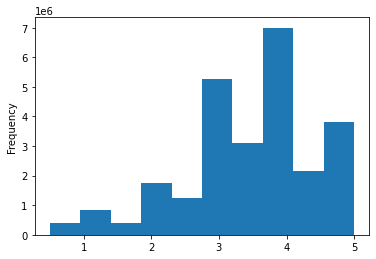

In [196]:
pd.options.display.float_format= '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe